## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
path = r"/Users/katalysenko/Documents/Airbnb Analysis"

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','df_clean.csv'))

## Data cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'name', 'host_identity_verified', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'country', 'country code',
       'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

In [6]:
df.shape

(84186, 22)

In [7]:
df.head()

,Unnamed: 0,name,host_identity_verified,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,0,Clean & quiet apt home by the park,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,...,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1,Skylit Midtown Castle,verified,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,...,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,4,Entire Apt: Spacious Studio/Loft by central park,verified,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,...,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
3,5,Large Cozy 1 BR Apartment In Midtown East,verified,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,...,2013.0,$577,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0
4,7,BlissArtsSpace!,unconfirmed,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,...,2009.0,"$1,060",$212,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0


In [8]:
# removed the dollar icon in the price and service fee column so that it does not interfere with our analysis

df['price'] = df['price'].str.replace('[$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].str.replace('[$,]', '', regex=True).astype(float)

In [9]:
df.head()

,Unnamed: 0,name,host_identity_verified,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,0,Clean & quiet apt home by the park,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,...,2020.0,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1,Skylit Midtown Castle,verified,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,...,2007.0,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,4,Entire Apt: Spacious Studio/Loft by central park,verified,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,...,2009.0,204.0,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
3,5,Large Cozy 1 BR Apartment In Midtown East,verified,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,...,2013.0,577.0,115.0,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0
4,7,BlissArtsSpace!,unconfirmed,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,...,2009.0,1060.0,212.0,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0


In [12]:
df_subset = df.select_dtypes(include=['int64', 'float64'])

In [13]:
df_subset.head()

,Unnamed: 0,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,0,40.64749,-73.97237,2020.0,966.0,193.0,10.0,9.0,0.21,4.0,6.0,286.0
1,1,40.75362,-73.98377,2007.0,142.0,28.0,30.0,45.0,0.38,4.0,2.0,228.0
2,4,40.79851,-73.94399,2009.0,204.0,41.0,10.0,9.0,0.10,3.0,1.0,289.0
3,5,40.74767,-73.97500,2013.0,577.0,115.0,3.0,74.0,0.59,3.0,1.0,374.0
4,7,40.68688,-73.95596,2009.0,1060.0,212.0,45.0,49.0,0.40,5.0,1.0,219.0


##  The elbow technique

In [14]:
num_cl = range(1, 12) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [16]:
score = [kmeans[i].fit(df_subset).score(df_subset) for i in range(len(kmeans))] 


score

/Users/katalysenko/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/katalysenko/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/katalysenko/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/katalysenko/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

[-73364260433202.58,
 -17950252926681.78,
 -8289461228970.152,
 -4456372336701.7295,
 -2909479223884.0986,
 -2004109984059.7344,
 -1450049263303.2363,
 -1125947340069.0251,
 -882997163677.4358,
 -729165825606.3822,
 -595134429650.2065]

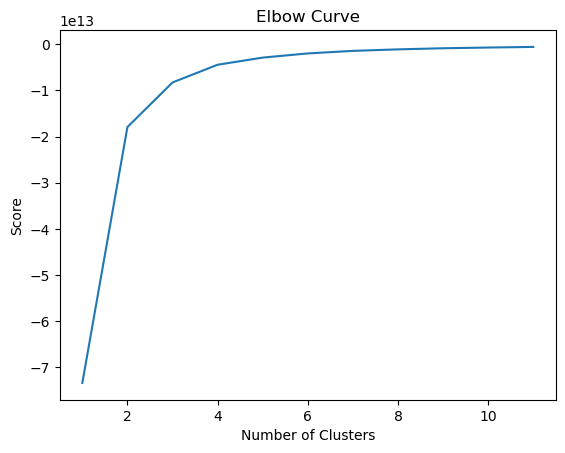

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow, which marks the point where the curve turns, indicates where the curve begins to level off. Here we see a transition from two to four on the x-axis. This leads me to the conclusion that the ideal number of clusters is four.

##  k-means clustering

In [18]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [19]:
kmeans.fit(df_subset)

/Users/katalysenko/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [20]:
df_subset['clusters'] = kmeans.fit_predict(df_subset)

/Users/katalysenko/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [21]:
df_subset.head()

,Unnamed: 0,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,clusters
0,0,40.64749,-73.97237,2020.0,966.0,193.0,10.0,9.0,0.21,4.0,6.0,286.0,1
1,1,40.75362,-73.98377,2007.0,142.0,28.0,30.0,45.0,0.38,4.0,2.0,228.0,1
2,4,40.79851,-73.94399,2009.0,204.0,41.0,10.0,9.0,0.10,3.0,1.0,289.0,1
3,5,40.74767,-73.97500,2013.0,577.0,115.0,3.0,74.0,0.59,3.0,1.0,374.0,1
4,7,40.68688,-73.95596,2009.0,1060.0,212.0,45.0,49.0,0.40,5.0,1.0,219.0,1


In [22]:
df_subset['clusters'].value_counts()

clusters
2    24330
0    22273
3    18891
1    18692
Name: count, dtype: int64

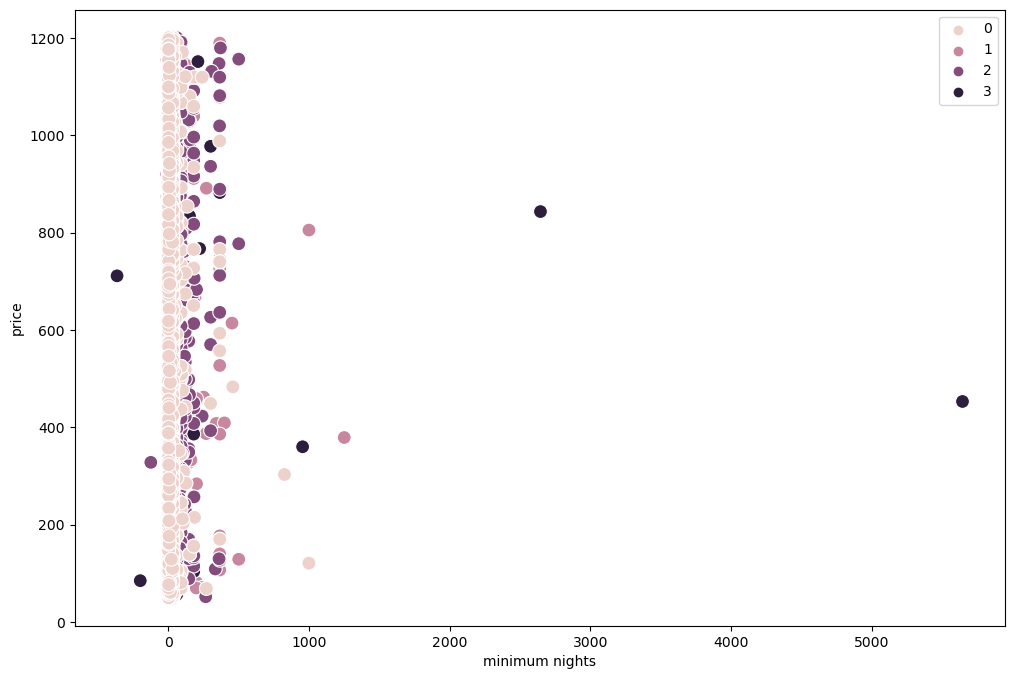

In [23]:
# Plot the clusters for the "Price" and "minimum nights" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset['minimum nights'], y=df_subset['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('minimum nights') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

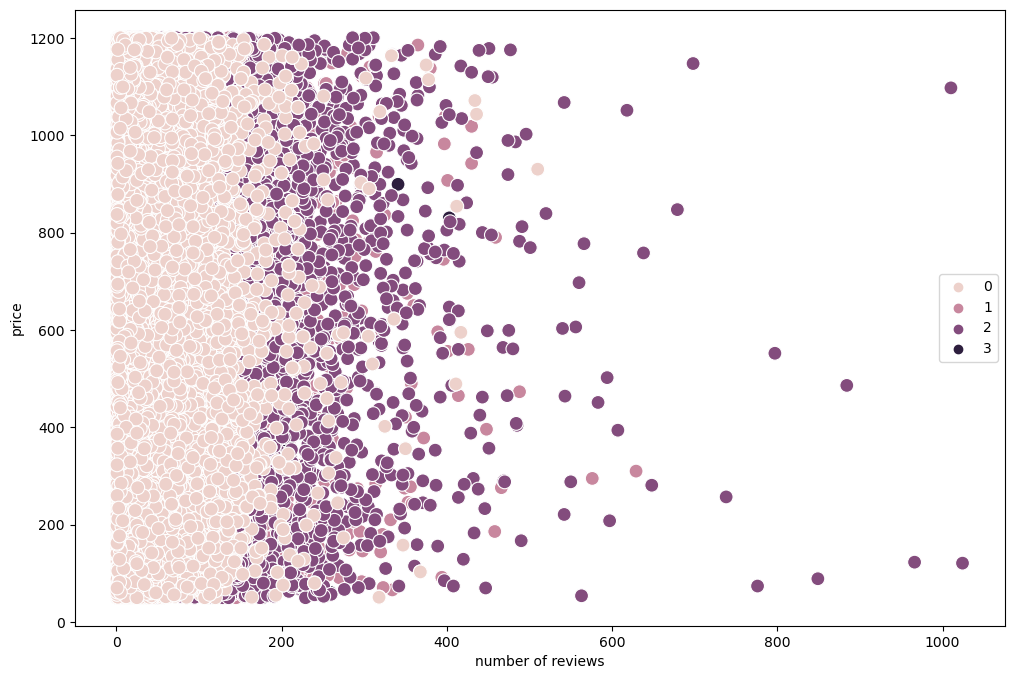

In [25]:
# Plot the clusters for the "number of reviews" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['number of reviews'], y=df['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('number of reviews') 
plt.ylabel('price') 
plt.show()

In [27]:
df_subset.loc[df_subset['clusters'] == 3, 'cluster'] = 'black'
df_subset.loc[df_subset['clusters'] == 2, 'cluster'] = 'dark purple'
df_subset.loc[df_subset['clusters'] == 1, 'cluster'] = 'purple'
df_subset.loc[df_subset['clusters'] == 0, 'cluster'] = 'pink'

The results indicate that the dark purple cluster typically shows the highest viewership rates, followed by the purple and pink clusters, while the black cluster tends to show very low viewership rates. These clusters indicate different levels of viewership, with the dark purple cluster reflecting the highest viewership and the dark cluster reflecting the lowest.

In [31]:
df_subset.groupby('cluster').agg({'availability 365':['mean', 'median'], 
                         'number of reviews':['mean', 'median'],
                         'minimum nights':['mean', 'median'],
                         'price':['mean', 'median'],
                          'service fee':['mean', 'median']})

availability 365        number of reviews        minimum nights  \
                        mean median              mean median           mean   
cluster                                                                       
dark purple       158.639827  141.5         40.533662   14.0      10.723880   
grey              115.328252   65.0         16.095125    7.0       5.239373   
pink              115.274009   61.0         29.175504   12.0       5.943070   
purple            178.093462  171.0         41.223946   14.0       7.072009   

                         price        service fee         
            median        mean median        mean median  
cluster                                                   
dark purple    3.0  627.112783  628.0  125.422647  126.0  
grey           2.0  628.433540  629.0  125.687947  126.0  
pink           2.0  627.890630  626.0  125.579356  125.0  
purple         3.0  620.496737  616.0  124.101434  123.0

### Propose what these results could be useful for in future steps of an analytics pipeline.

These results can be very useful for several future steps:
Analyzing the mean and median values between clusters for different characteristics, such as availability, number of reviews, minimum number of nights, price and cost of services, can help determine which ones contribute significantly to the differentiation of clusters. This knowledge can help with feature selection or prioritization in predictive modeling.